#### ÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥ºÏùò ÏßÑÎã®(diagnosis)Ïù¥ÎûÄ ÌöåÍ∑ÄÎ∂ÑÏÑùÏóê ÏÇ¨Ïö©Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÌöåÍ∑ÄÎ∂ÑÏÑùÏóê ÏÇ¨Ïö©Îêú Î™®Ìòï Í∞ÄÏ†ïÏùÑ Ï†úÎåÄÎ°ú ÎßåÏ°±ÌïòÍ≥† ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÎäî Í≥ºÏ†ïÏù¥Îã§.

## ÏûîÏ∞® Ï†ïÍ∑úÏÑ±

Îç∞Ïù¥ÌÑ∞Í∞Ä Î™®Ìòï Í∞ÄÏ†ïÏùÑ ÎßåÏ°±ÌïòÎ©¥ Î∂ÑÏÑùÍ≤∞Í≥ºÎ°ú ÎÇòÏò® ÏûîÏ∞®Îäî Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞ÎùºÏïº ÌïúÎã§. ÏòàÎ•º Îì§Ïñ¥ Îã§ÏùåÍ≥º Í∞ôÏù¥ 2Ï∞® ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäî Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†Ìòï Î™®ÌòïÏúºÎ°ú ÌöåÍ∑Ä Î∂ÑÏÑùÌïú Í≤ΩÏö∞Î•º ÏÇ¥Ìé¥Î≥¥Ïûê.

In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

In [2]:
def make_regression2(n_sample=100, bias=0, noise=0.3, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 4  # 0~1 Í∑†ÏùºÎ∂ÑÌè¨ ÎÇúÏàò * 4
    epsilon = noise * np.random.randn(n_sample) # noise * Í∞ÄÏö∞ÏãúÏïàÏ†ïÍ∑úÎ∂ÑÌè¨ ÎÇúÏàò 100Í∞ú
    y = x ** 2 + bias + epsilon
    return x, y

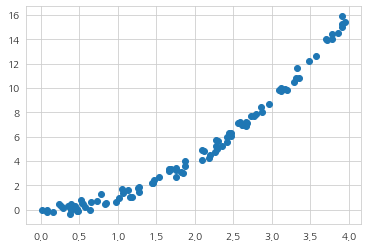

In [3]:
x2, y2 = make_regression2()
plt.scatter(x2, y2)
plt.show()

In [4]:
import pandas as pd
import statsmodels.api as sm
import scipy as sp

In [6]:
dfX20 = pd.DataFrame(x2, columns=["X1"])
dfX2 = sm.add_constant(dfX20)
dfy2 = pd.DataFrame(y2, columns=["y"])

model2 = sm.OLS(dfy2, dfX2)
result2 = model2.fit()

QQÌîåÎ°ØÍ≥º Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ïÏóêÏÑú Î≥¥ÎìØÏù¥ ÏûîÏ∞®Îäî Ï†ïÍ∑ú Î∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§.

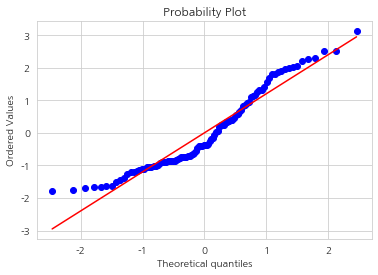

In [7]:
sp.stats.probplot(result2.resid, plot=plt)
plt.show()

In [8]:
test = sm.stats.omni_normtest(result2.resid)
test

NormaltestResult(statistic=9.519843718949762, pvalue=0.008566278744865582)

In [12]:
for xi in zip(["Chi^2", 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  9.520
P-value     :  0.009


Ïú†ÏùòÌôïÎ•†Ïù¥ 0.9%Î°ú Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏûàÎã§.

In [13]:
test = sm.stats.jarque_bera(result2.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  8.123
P-value     :  0.017
Skew        :  0.608
Kurtosis    :  2.314


ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ïú†ÏùòÌôïÎ•†Ïù¥ 1.7%Ïù¥ÎØÄÎ°ú Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏûàÎã§.

## ÏûîÏ∞®ÏôÄ ÎèÖÎ¶Ω Î≥ÄÏàòÏùò Í¥ÄÍ≥Ñ

Ïù¥Î≤àÏóêÎäî ÎòêÎã§Î•∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥Ïûê. Ïù¥ Îç∞Ïù¥ÌÑ∞ÎèÑ 2Ï∞® Ìï®Ïàò Í¥ÄÍ≥ÑÎ•º Îî∞Î•¥Í≥† ÏûàÏúºÎØÄÎ°ú ÏÑ†Ìòï Î™®ÌòïÏùÑ Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§.

In [17]:
def make_regression3(n_sample=100, bias=0, noise=0.5, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 3 - 1
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y

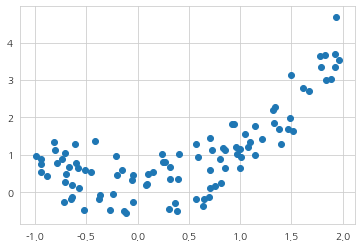

In [18]:
x3, y3 = make_regression3()
plt.scatter(x3, y3)
plt.show()

In [20]:
dfX30 = pd.DataFrame(x3, columns=["X1"])
dfX3 = sm.add_constant(dfX30)
dfy3 = pd.DataFrame(y3, columns=["y"])

model3 = sm.OLS(dfy3, dfX3)
result3 = model3.fit()

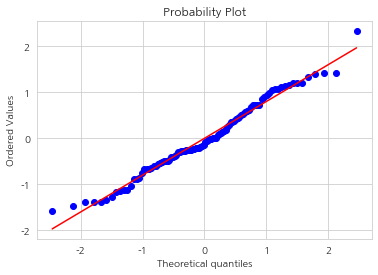

In [21]:
sp.stats.probplot(result3.resid, plot=plt)
plt.show()

In [22]:
test = sm.stats.omni_normtest(result3.resid)
for ix in zip(["Chi^2", "P-value"], test):
    print("%-12s: %6.3f" % ix)

Chi^2       :  1.202
P-value     :  0.548


Ïù¥ Í≤ΩÏö∞Îäî Ïú†ÏùòÌôïÎ•†Ïù¥ 54.8%Ïù¥ÎØÄÎ°ú Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÎã§. Ï¶â ÏûîÏ∞®Îäî Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Í≥† Ìï† Ïàò ÏûàÎã§.

Îç∞Ïù¥ÌÑ∞Í∞Ä Î™®Ìòï Í∞ÄÏ†ïÏùÑ Îî∞Î•¥ÏßÄ ÏïäÏßÄÎßå ÏûîÏ∞®Îäî Ï†ïÍ∑ú Î∂ÑÌè¨Î•º Îî∞Î•¥Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. ( Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÏßÄÎßå ÏûîÏ∞®Îäî Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Îäî Í≤ΩÏö∞)

##### Ïù¥Îü¨Ìïú Í≤ΩÏö∞ÏóêÎäî ÏûîÏ∞®ÏôÄ ÎèÖÎ¶Ω Î≥ÄÏàòÍ∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÏÇ¥Ìé¥Î≥¥Îäî Í≤ÉÏù¥ ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÎã§. 

Îç∞Ïù¥ÌÑ∞Í∞Ä Ïò¨Î∞îÎ•∏ Î™®ÌòïÏúºÎ°ú Î∂ÑÏÑùÎêòÏóàÎã§Î©¥ ÏûîÏ∞®Îäî ÎçîÏù¥ÏÉÅ ÎèÖÎ¶Ω Î≥ÄÏàòÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÏßÄ ÏïäÏïÑÏïº ÌïúÎã§. ÎßåÏïΩ ÏûîÏ∞®ÏôÄ ÎèÖÎ¶Ω Î≥ÄÏàòÍ∞ÑÏóê Ïñ¥Îñ§ ÎπÑÏÑ†Ìòï ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Ï∞æÏùÑ Ïàò ÏûàÎã§Î©¥ Ïò¨Î∞îÎ•∏ Î™®ÌòïÏù¥ ÏïÑÎãàÎã§.

Îã§Îßå ÏûîÏ∞®ÏôÄ ÌäπÏ†ï ÎèÖÎ¶Ω Î≥ÄÏàòÍ∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Ï†ÑÏ≤¥ Î™®ÌòïÏù¥ Ïò¨Î∞îÎ•∏ Î™®ÌòïÏù¥ ÏïÑÎãàÎùºÎäî Í≤ÉÏùÑ ÏïåÎ†§Ï§Ñ ÎøêÏù¥ÏßÄ Ïñ¥Îñ§ Î™®ÌòïÏù¥ Ïò¨Î∞îÎ•∏ Î™®ÌòïÏù∏ÏßÄÏóê ÎåÄÌïú Ï†ïÎ≥¥Îäî Ï£ºÏßÄ ÏïäÎäîÎã§.



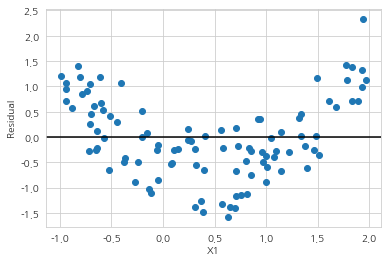

In [23]:
plt.plot(x3, result3.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

## Ïù¥Î∂ÑÏÇ∞ÏÑ±

ÏÑ†ÌòïÌöåÍ∑Ä Î™®ÌòïÏóêÏÑúÎäî Ï¢ÖÏÜç Î≥ÄÏàò Í∞íÏùò Î∂ÑÏÇ∞Ïù¥ ÎèÖÎ¶Ω Î≥ÄÏàòÏùò Í∞íÍ≥º ÏÉÅÍ¥ÄÏóÜÏù¥ Í≥†Ï†ïÎêú Í∞íÏùÑ Í∞ÄÏ†∏Ïïº ÌïúÎã§. 

##### Í∑∏Îü¨ÎÇò Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Îäî ÎèÖÎ¶Ω Î≥ÄÏàò Í∞íÏùò ÌÅ¨Í∏∞Í∞Ä Ïª§ÏßÄÎ©¥ Ï¢ÖÏÜç Î≥ÄÏàò Í∞íÏùò Î∂ÑÏÇ∞ÎèÑ Ïª§ÏßÄÎäî Ïù¥Î∂ÑÏÇ∞ÏÑ±(heteroskedastic) Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌïúÎã§. 

##### Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Î°úÍ∑∏ Î≥ÄÌôòÌïú Ìä∏ÎûúÏä§Î°úÍ∑∏(translog) Î™®ÌòïÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Ïù¥Î∂ÑÏÇ∞ÏÑ± Î¨∏Ï†úÍ∞Ä Ìï¥Í≤∞ÎêòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÎã§.

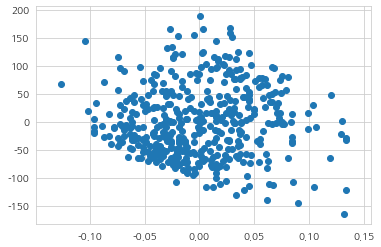

In [25]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=["x%d" % (i + 1) for i in range(diabetes.data.shape[1])]),
               pd.DataFrame(diabetes.target, columns=["target"])], axis=1)

model = sm.OLS.from_formula("target ~ x9", data=df)
result = model.fit()

plt.scatter(df["x9"], result.resid)
plt.show()

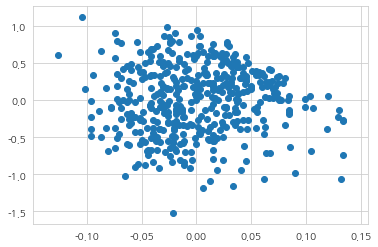

In [26]:
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=["x%d" % (i + 1) for i in range(diabetes.data.shape[1])]),
               pd.DataFrame(np.log(diabetes.target), columns=["target"])], axis=1)

model = sm.OLS.from_formula("target ~ x9", data=df)
result = model.fit()

plt.scatter(df["x9"], result.resid)
plt.show()

## ÏûêÍ∏∞ ÏÉÅÍ¥Ä Í≥ÑÏàò

ÏÑ†Ìòï ÌöåÍ∑Ä Î™®ÌòïÏóêÏÑúÎäî Ïò§Ï∞®(disturbance)Îì§Ïù¥ ÏÑúÎ°ú (Î™®Ïàò-Ï°∞Í±¥Î∂Ä) ÎèÖÎ¶ΩÏù¥ÎùºÍ≥† Í∞ÄÏ†ïÌïòÍ≥† ÏûàÎã§. Îî∞ÎùºÏÑú ÏûîÏ∞®(residual)ÎèÑ ÏÑúÎ°ú ÎèÖÎ¶ΩÏù¥Ïñ¥Ïïº ÌïúÎã§. ÎßåÏïΩ ÏÑúÎ°ú ÎèÖÎ¶ΩÏù¥ ÏïÑÎãàÎùºÎ©¥ ÏÑ†ÌòïÌöåÍ∑Ä Î™®ÌòïÏù¥ ÏïÑÎãå ARMA Î™®Ìòï Îì±Ïùò ÏãúÍ≥ÑÏó¥ Î™®ÌòïÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº ÌïúÎã§.

Ïò§Ï∞®Í∞Ä ÎèÖÎ¶ΩÏù∏ÏßÄ Í≤ÄÏ†ïÌïòÎäî Î∞©Î≤ïÏùÄ ÏûîÏ∞®Î•º ÏãúÍ≥ÑÏó¥Î°ú Í∞ÄÏ†ïÌïòÏó¨ ÏûêÍ∏∞ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Íµ¨ÌïòÎäî Í≤ÉÏù¥Îã§. ÎßåÏïΩ ÎèÖÎ¶ΩÏù¥ÎùºÎ©¥ ÏãúÏ∞®(lag)Í∞Ä 0Ïù∏ Í≤ΩÏö∞Î•º Ï†úÏô∏ÌïòÍ≥†Îäî ÏûêÍ∏∞ÏÉÅÍ¥ÄÍ≥ÑÏàò  ùúåùëô  Ïù¥ 0Ïù¥Ïñ¥Ïïº ÌïúÎã§. Ïù¥Î•º Í≤ÄÏÇ¨ÌïòÎäî Í≤ÄÏ¶ùÏúºÎ°úÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≤ÉÎì§Ïù¥ ÏûàÎã§.

+ Box-Pierce Í≤ÄÏ†ï
+ Ljung-Box Í≤ÄÏ†ï
+ Durbin-Watson Í≤ÄÏ†ï

Ïù¥ Í≤ÄÏ†ïÎì§ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ Í∑ÄÎ¨¥ Í∞ÄÏÑ§ÏùÑ Í≤ÄÏ¶ùÌïúÎã§.

$$H_0: \rho_l = 0 \;\;\;\text{ for } i = 1, 2, \cdots, l$$